<h1 style="text-align:center;"> Walmart Data Analysis & Forecasting</h1>

In this data analysis project, I have gotten a Walmart dataset from https://www.kaggle.com/datasets/asahu40/walmart-data-analysis-and-forcasting/data and I will be analyzing the contents and see what trends I can find within the set and what predictions I can make from it as well. 

The first order of business is cleaning the dataset which I have done in Excel. Lets load in the dataset and examine its contents:

In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv('Walmart Data Analysis and Forcasting.csv')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,5/2/2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12/2/2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19/02/2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26/02/2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,5/3/2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [16]:
df.shape

(6435, 8)

As we can examine we have 8 columns and 6435 rows. Here is what each column reperesents:

Store: classification variable that gives each unique store a numeric number  
Date: day being tracked (dd/mm/yy)  
Weekly_Sales: sales for the week in dollars  
Holiday_Flag: boolean variable where 1 represents a holiday and 0 represents regular day  
Temprature: in fahrenheit  
Fuel_Price: cost of gas per gallon in dollars  
CPI: Consumer Price Index as compared to the previous year (Note this data is coming from a recession era)  
Unemployment: unemployment rate during the day  

Lets look at general statistics of the data now:

In [18]:
df.describe()

,Store,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
count,6435.000000,6.435000e+03,6435.000000,6435.000000,6435.000000,6435.000000,6435.000000
mean,23.000000,1.046965e+06,0.069930,60.663782,3.358607,171.578394,7.999151
std,12.988182,5.643666e+05,0.255049,18.444933,0.459020,39.356712,1.875885
min,1.000000,2.099862e+05,0.000000,-2.060000,2.472000,126.064000,3.879000
25%,12.000000,5.533501e+05,0.000000,47.460000,2.933000,131.735000,6.891000
50%,23.000000,9.607460e+05,0.000000,62.670000,3.445000,182.616521,7.874000
75%,34.000000,1.420159e+06,0.000000,74.940000,3.735000,212.743293,8.622000
max,45.000000,3.818686e+06,1.000000,100.140000,4.468000,227.232807,14.313000


Alot of good data has been uncovered but the main thing I am going to use is the mean and standard deviation. Since there are 6435 data points (rows of data), this set can be generalized using the normal distribution. Lets plot some of the variables against each oher and see what patterns we can find.

<h3 style="text-align:center;">Data Analysis (Simple LR)</h3>

Lets investigate Average Weekly Sales by Store:

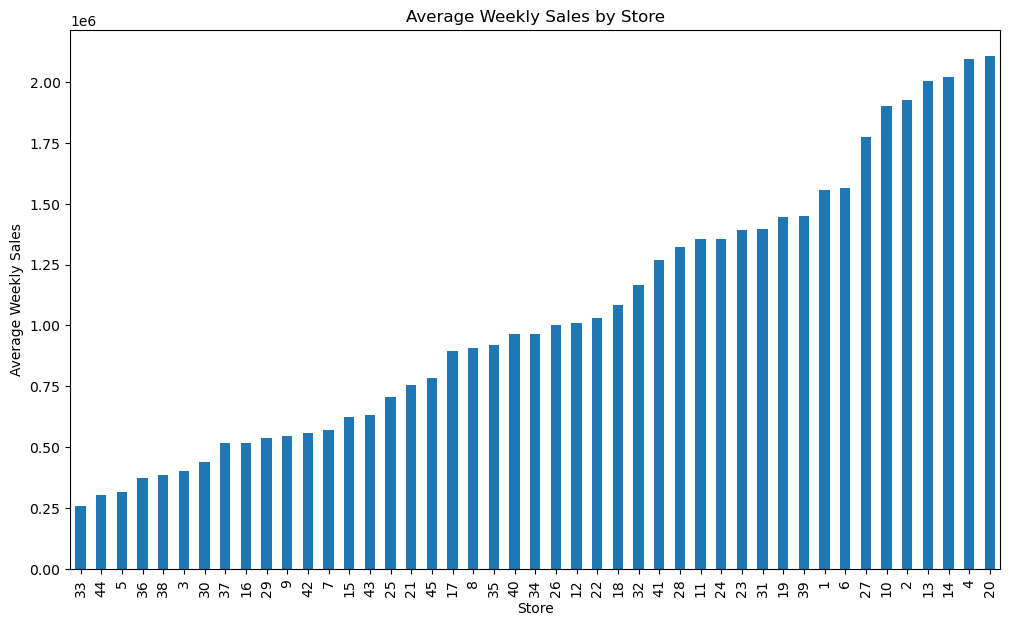

In [19]:
import matplotlib.pyplot as plt

# Calculate average weekly sales for each store
average_sales = df.groupby('Store')['Weekly_Sales'].mean()

# Create a bar plot
average_sales.sort_values().plot(kind='bar', figsize=(12,7))

plt.title('Average Weekly Sales by Store')
plt.xlabel('Store')
plt.ylabel('Average Weekly Sales')

# Display the plot
plt.show()

Over here we can see how each store preforms per week via average weekly sales from lowest to highest. Store 33 has the worst weekly sales generating about 250K in sales while store 20 is the greatest with over 2 million in weekly sales.

Whenever a holiday comes around, stores seem to get alot more busy. Is this something that can be backed by data? Lets see if holiday weeks have greater sales than non-holiday weeks and compare the two:

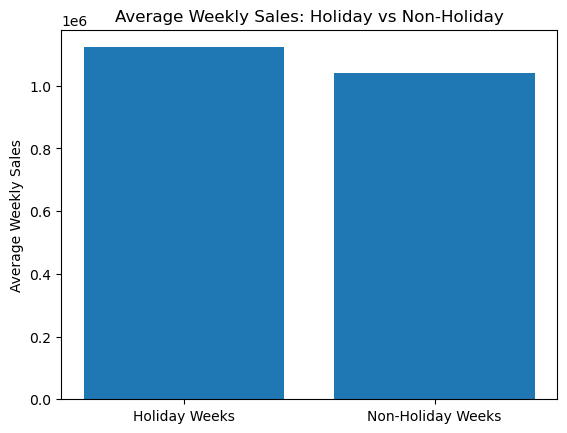

In [21]:
average_sales_holiday = df[df['Holiday_Flag'] == 1]['Weekly_Sales'].mean()
average_sales_non_holiday = df[df['Holiday_Flag'] == 0]['Weekly_Sales'].mean()

#Compile
data = [average_sales_holiday, average_sales_non_holiday]
labels = ['Holiday Weeks', 'Non-Holiday Weeks']

# Create bar plot
plt.bar(labels, data)
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales: Holiday vs Non-Holiday')

# Show the plot
plt.show()

As the graph shows, holidays do indeed have spiked sales but not at the rate that I may have imagined it in my head

As warmer days roll around, people seem to go outside a lot more. Does this mean people are also more likely to go buy items at Walmart? Lets compare weekly temprature to the average weekly sales: 

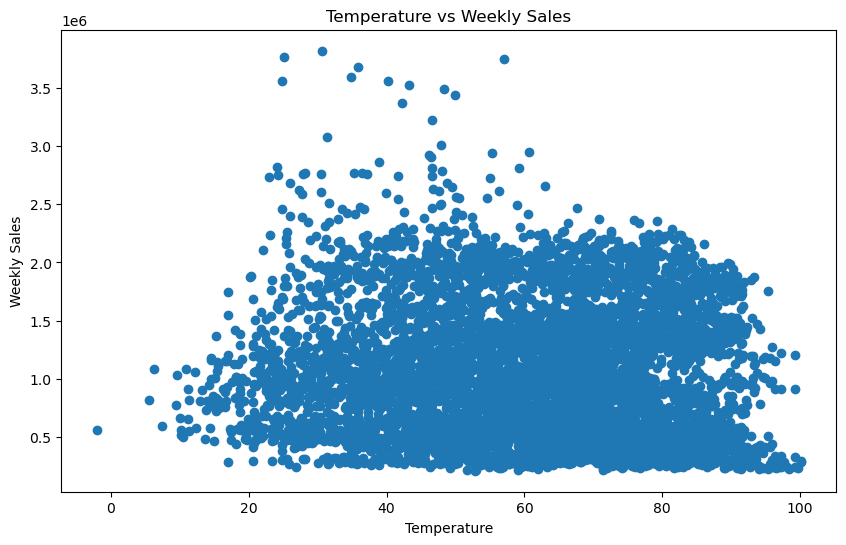

In [23]:
# Create a scatter plot
plt.figure(figsize=(10, 6))
plt.scatter(df['Temperature'], df['Weekly_Sales'])
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Temperature vs Weekly Sales')

# Show the plot
plt.show()

The trend is very difficult to see. Lets fit a regression line and see the correlation coefficent to see if there is a definitive trend:

The linear regression line equation is: y = -1952.419227*X + 1165406.012792
The correlation coefficient is: -0.063810


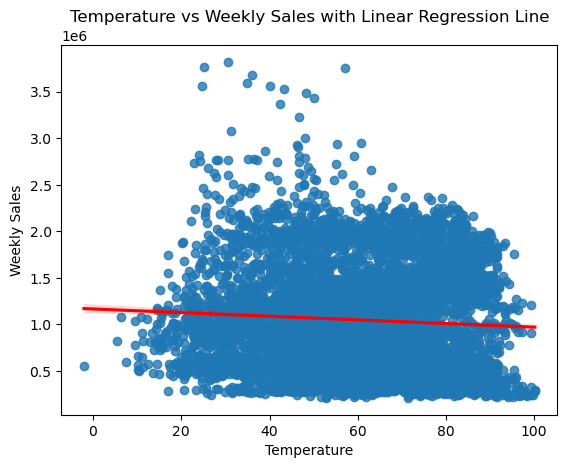

In [26]:
import seaborn as sns
import statsmodels.api as sm


# Fit the model
model = sm.OLS(y, X)
results = model.fit()

sns.regplot(x='Temperature', y='Weekly_Sales', data=df, line_kws={'color':'red'})
plt.xlabel('Temperature')
plt.ylabel('Weekly Sales')
plt.title('Temperature vs Weekly Sales with Linear Regression Line')

print("The linear regression line equation is: y = %.6f*X + %.6f" % (results.params['Temperature'], results.params['const']))

# Calculate and print correlation coefficient
correlation_coef = np.corrcoef(df['Temperature'], df['Weekly_Sales'])[0, 1]
print("The correlation coefficient is: %.6f" % correlation_coef)


# Show the plot
plt.show()

Here we have fitted a regression line and have found the correlation coefficent. Because the correlation coefficent is close to 0 and the regression line slope is almost horizontal, we can conclude that temprature has little to no significant effect on weekly sales. 

Everyone has heard a joke about gas prices being so high that they would not drive their car. Although that statement is completly satrical, could it be true that higher gas prices corolate to less Walmart spending? Lets find out:

The linear regression line equation is: y = 11635.764283*X + 1007884.920080
The correlation coefficient is: 0.009464


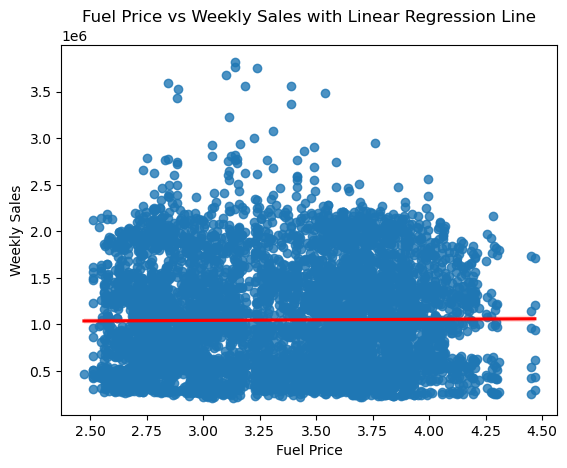

In [29]:
df.dropna(inplace=True) # This might be required if your data contains NaN values.
X = df['Fuel_Price'] 
y = df['Weekly_Sales']
X = sm.add_constant(X) # Adding a constant (intercept term) to the model

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

sns.regplot(x='Fuel_Price', y='Weekly_Sales', data=df, line_kws={'color':'red'})
plt.xlabel('Fuel Price')
plt.ylabel('Weekly Sales')
plt.title('Fuel Price vs Weekly Sales with Linear Regression Line')

print("The linear regression line equation is: y = %.6f*X + %.6f" % (results.params['Fuel_Price'], results.params['const']))

# Calculate and print correlation coefficient
correlation_coef = np.corrcoef(df['Fuel_Price'], df['Weekly_Sales'])[0, 1]
print("The correlation coefficient is: %.6f" % correlation_coef)

# Show the plot
plt.show()

Again here, there seems to be very little correlation between the two variables and therefore we can also conclude that fuel price has minimal to no impact on Walmart weekly sales.


Lets see if economics plays a factor in Walmart weekly sales. We are going to compare CPI and unemployment rates to weekly sales. 

The linear regression line equation is: y = -1041.557953*X + 1225673.718154
The correlation coefficient is: 0.009464


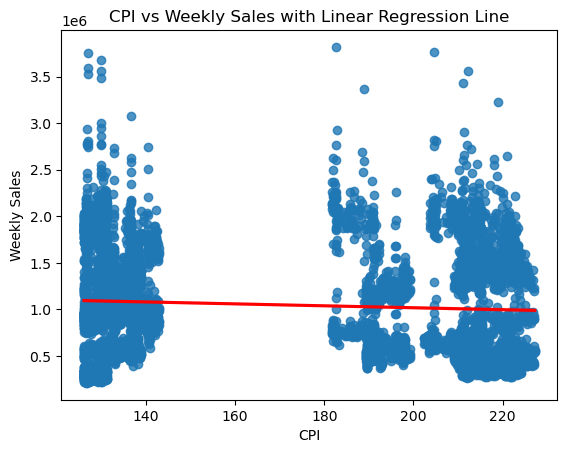

In [33]:
df.dropna(inplace=True) # This might be required if your data contains NaN values.
X = df['CPI'] 
y = df['Weekly_Sales']
X = sm.add_constant(X) # Adding a constant (intercept term) to the model

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

sns.regplot(x='CPI', y='Weekly_Sales', data=df, line_kws={'color':'red'})
plt.xlabel('CPI')
plt.ylabel('Weekly Sales')
plt.title('CPI vs Weekly Sales with Linear Regression Line')

print("The linear regression line equation is: y = %.6f*X + %.6f" % (results.params['CPI'], results.params['const']))

# Calculate and print correlation coefficient
correlation_coef = np.corrcoef(df['Fuel_Price'], df['Weekly_Sales'])[0, 1]
print("The correlation coefficient is: %.6f" % correlation_coef)

# Show the plot
plt.show()

The linear regression line equation is: y = -31943.454973*X + 1302485.398913
The correlation coefficient is: -0.106176


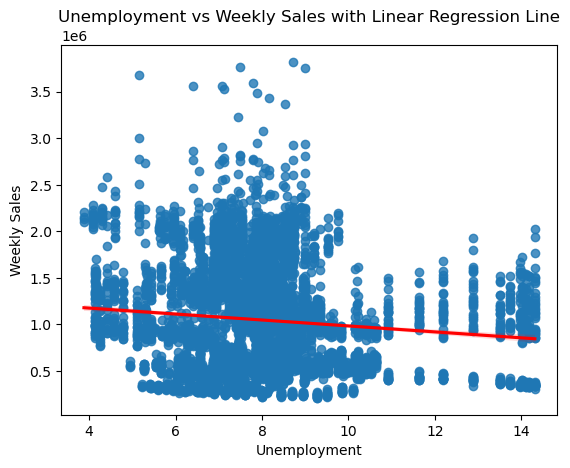

In [34]:
df.dropna(inplace=True) # This might be required if your data contains NaN values.
X = df['Unemployment'] 
y = df['Weekly_Sales']
X = sm.add_constant(X) # Adding a constant (intercept term) to the model

# Fit the model
model = sm.OLS(y, X)
results = model.fit()

sns.regplot(x='Unemployment', y='Weekly_Sales', data=df, line_kws={'color':'red'})
plt.xlabel('Unemployment')
plt.ylabel('Weekly Sales')
plt.title('Unemployment vs Weekly Sales with Linear Regression Line')

print("The linear regression line equation is: y = %.6f*X + %.6f" % (results.params['Unemployment'], results.params['const']))

# Calculate and print correlation coefficient
correlation_coef = np.corrcoef(df['Unemployment'], df['Weekly_Sales'])[0, 1]
print("The correlation coefficient is: %.6f" % correlation_coef)

# Show the plot
plt.show()

As we can see from the two graphs, CPI doesnt have too much of an impact on sales but unemploument rates does have a slight impact on sales.

<h3 style="text-align:center;">Data Analysis (Multiple LR)</h3>

We have so far compared indivisual variables to the total outcome (in this case Weekly Sales) but how do all these variables come to play to make up the whole thing? Here we can use multiple LR to answer this question.

In [36]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

mlr_model = smf.ols(
        formula = 'Weekly_Sales ~ Store + Holiday_Flag + Temperature + Fuel_Price + CPI + Unemployment', data = df).fit()

mlr_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           Weekly_Sales   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.141
Method:                 Least Squares   F-statistic:                     176.7
Date:                Sun, 14 Jan 2024   Prob (F-statistic):          9.33e-209
Time:                        21:21:47   Log-Likelihood:                -93861.
No. Observations:                6435   AIC:                         1.877e+05
Df Residuals:                    6428   BIC:                         1.878e+05
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     1.996e+06   7.54e+04     26.461      0.000    1.85e+06    2.14e+06
Store        -1.539e+04    521.895    -29.486      0.000   -1.64e+04   -1.44e+04
Holiday_Flag  7.303e+04   2.59e+04      2.815      0.005    2.22e+04    1.24e+05
Temperature   -975.4019    375.974     -2.594      0.009   -1712.436    -238.367
Fuel_Price    9596.0739   1.48e+04      0.648      0.517   -1.94e+04    3.86e+04
CPI          -2319.4558    184.772    -12.553      0.000   -2681.670   -1957.241
Unemployment -2.188e+04   3788.000     -5.776      0.000   -2.93e+04   -1.45e+04
==============================================================================
Omnibus:                      188.961   Durbin-Watson:                   0.130
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              205.250
Skew:                           0.435   Prob(JB):                     2.69e-45
Kurtosis:                       3.100   Cond. No.                     2.19e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 2.19e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

After running the multiple linear regression on the variables, we find that the R-squared value is a low 0.142. This means that the following variables fail to provide meaningful insight into how they impact total weekly sales. This would be an indication that we dont't have proper data to discover meaningful insights to what really drives weekly sales.

<h3 style="text-align:center;">Forecasting</h3>

Lets take a look at the date vs sales graph and see what it looks like. It would be difficult to visualize all the data at once so lets look at stores 1,15, and 36 to see how they look:

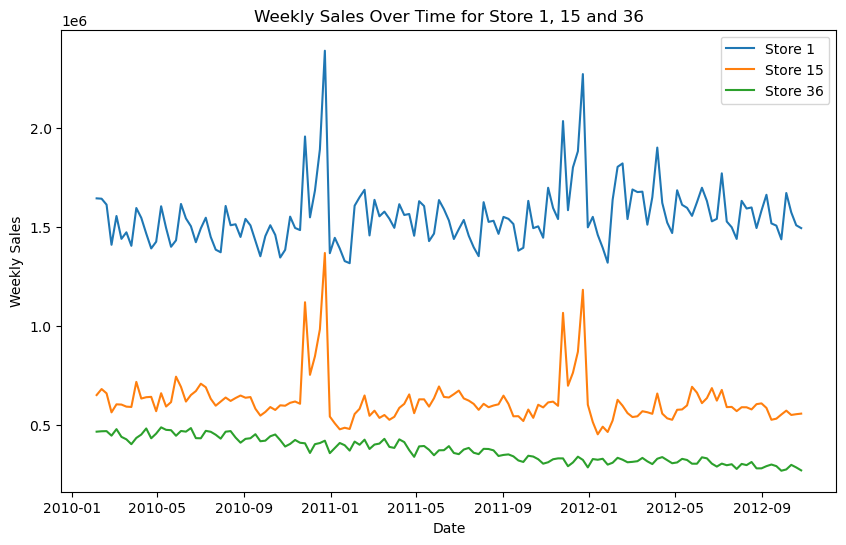

In [53]:
# Converting the 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Sorting the DataFrame by 'Date'
df.sort_values(by=['Date'], inplace=True, ascending=True)

# Filtering the DataFrame for stores
stores_to_plot = [1, 15, 36]

# Starting the figure
plt.figure(figsize=(10, 6))

# Looping over the selected stores
for store in stores_to_plot:
    df_store = df[df['Store'] == store]
    plt.plot(df_store['Date'], df_store['Weekly_Sales'], label=f'Store {store}')

# Adding title and labels
plt.title('Weekly Sales Over Time for Store 1, 15 and 36')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')

# Adding legend
plt.legend()

# Show the plot
plt.show()

Lets take an average for all the stores and see what that graph looks like:

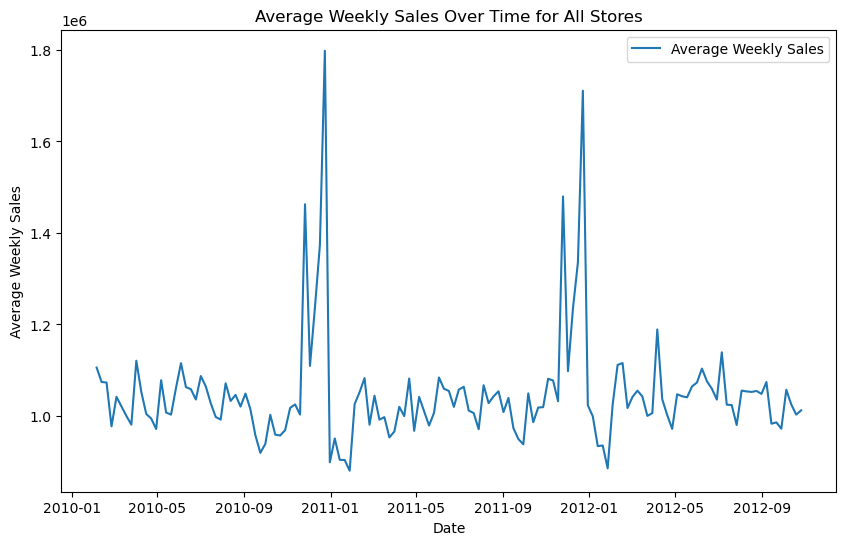

In [58]:
# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Sorting the DataFrame by 'Date'
df.sort_values(by=['Date'], inplace=True, ascending=True)

# Group by Date and calculate the average of 'Weekly_Sales' for all stores
df_average_sales = df.groupby('Date')['Weekly_Sales'].mean().reset_index()

# Plotting the Average Weekly Sales for all stores
plt.figure(figsize=(10, 6))
plt.plot(df_average_sales['Date'], df_average_sales['Weekly_Sales'], label='Average Weekly Sales')

# Adding titles and labels
plt.title('Average Weekly Sales Over Time for All Stores')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')

# Adding legend
plt.legend()

# Show the plot
plt.show()

The data is short but we can see some trends and seasonality within the graph. This is a perfect situation to use a Holts-Winter forecast. Lets use it to get the forecast for the year 2013:

C:\Users\Ahash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Ahash\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


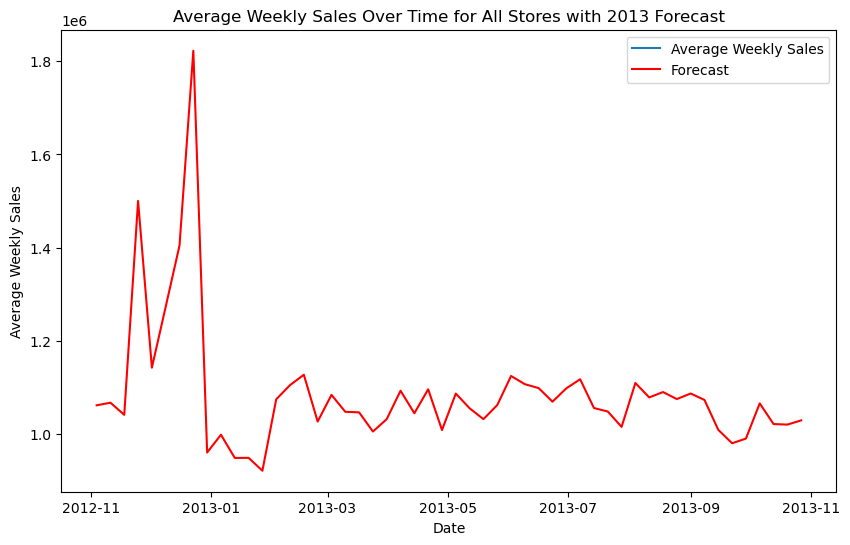

In [60]:

df_average_sales = df.groupby('Date')['Weekly_Sales'].mean()

# Fitting the Holt-Winters model
from statsmodels.tsa.api import ExponentialSmoothing
model = ExponentialSmoothing(df_average_sales, seasonal_periods=52, trend='add', seasonal='add').fit()

# Generate forecast for next 52 periods (or for year 2013)
forecast = model.forecast(52)

# Create a new DataFrame to hold the forecast
df_forecast = pd.DataFrame({'Date': pd.date_range(start=df_average_sales.index.max(), periods=53, freq='W')[1:], 
                            'Weekly_Sales': forecast.values})
df_forecast.set_index('Date', inplace=True)

# Combine the original data and the forecast
df_combined = pd.concat([df_average_sales, df_forecast], axis=0)

# Plotting the Average Weekly Sales along with the forecast for all stores
plt.figure(figsize=(10, 6))
plt.plot(df_combined.index[:-52], df_combined['Weekly_Sales'][:-52], label='Average Weekly Sales')
plt.plot(df_combined.index[-52:], df_combined['Weekly_Sales'][-52:], label='Forecast', color='red')

# Adding titles and labels
plt.title('Average Weekly Sales Over Time for All Stores with 2013 Forecast')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')

# Adding legend
plt.legend()

# Show the plot
plt.show()

Lets append the two graphs:

C:\Users\Ahash\anaconda3\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency W-FRI will be used.
  self._init_dates(dates, freq)
C:\Users\Ahash\anaconda3\Lib\site-packages\statsmodels\tsa\holtwinters\model.py:917: ConvergenceWarning: Optimization failed to converge. Check mle_retvals.
  warnings.warn(


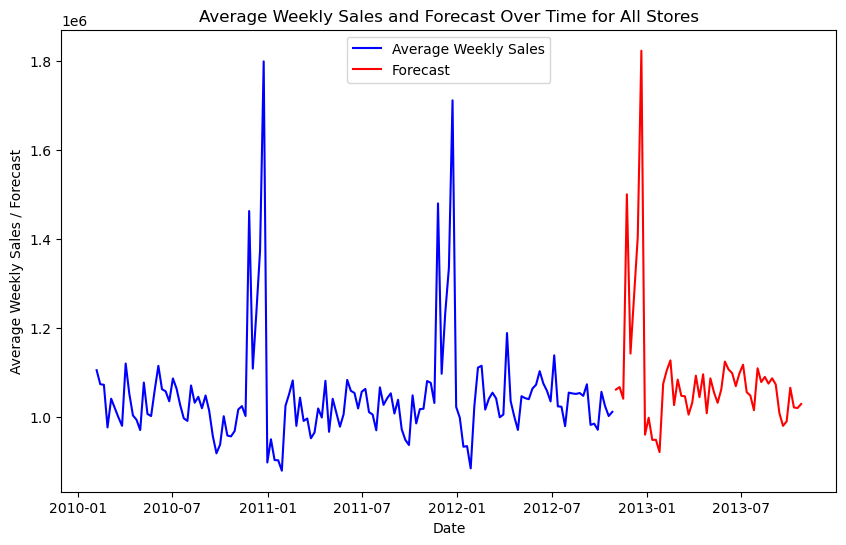

In [61]:
import pandas as pd
from statsmodels.tsa.api import ExponentialSmoothing
import matplotlib.pyplot as plt

# Converting 'Date' column to datetime format
df['Date'] = pd.to_datetime(df['Date'], dayfirst=True)

# Sorting the DataFrame by 'Date'
df.sort_values(by=['Date'], inplace=True, ascending=True)

# Group by Date and calculating the average of 'Weekly_Sales' for all stores
df_average_sales = df.groupby('Date')['Weekly_Sales'].mean()

# Fit the model
model = ExponentialSmoothing(df_average_sales, seasonal_periods=52, trend='add', seasonal='add').fit()

# Forecast for next 52 periods
forecast = model.forecast(52)

# Append this forecast to existing df_average_sales.
df_forecast = pd.DataFrame(forecast, columns=['Forecast'])
df_combined = pd.concat([df_average_sales, df_forecast], axis=1)

# Starting the figure
plt.figure(figsize=(10, 6))

# Plotting Average Weekly Sales and the forecast
plt.plot(df_combined.index, df_combined['Weekly_Sales'], label='Average Weekly Sales', color='blue')
plt.plot(df_combined.index, df_combined['Forecast'], label='Forecast', color='red')

# Adding titles and labels
plt.title('Average Weekly Sales and Forecast Over Time for All Stores')
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales / Forecast')

# Adding legend
plt.legend()

# Show the plot
plt.show()

Here is the completed forecast. As we can see, the trends for 2013 highly mimic the activity before. This is because the holts winter model acknowledges the trends and seasonality from previous peroids to make new predictions

<h3 style="text-align:center;">Conclusion</h3>

I hope you enjoyed reading through my data analysis project on Walmart. I have many more projects on my github at https://github.com/asadhashmi09